<a href="https://www.kaggle.com/code/salilmandal/deeplense-lens-detection?scriptVersionId=229014187" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deeplense-lensefinding-dataset/train_lenses/422.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/331.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/280.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/970.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/745.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/100.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/1200.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/1170.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/719.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/1041.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/193.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/1191.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/461.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/63.npy
/kaggle/input/deeplense-lensefinding-dataset/train_lenses/1364.npy
/kaggl

# Installing required libraries

In [1]:
pip install timm albumentations torch torchvision numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


# Visualize the dataset

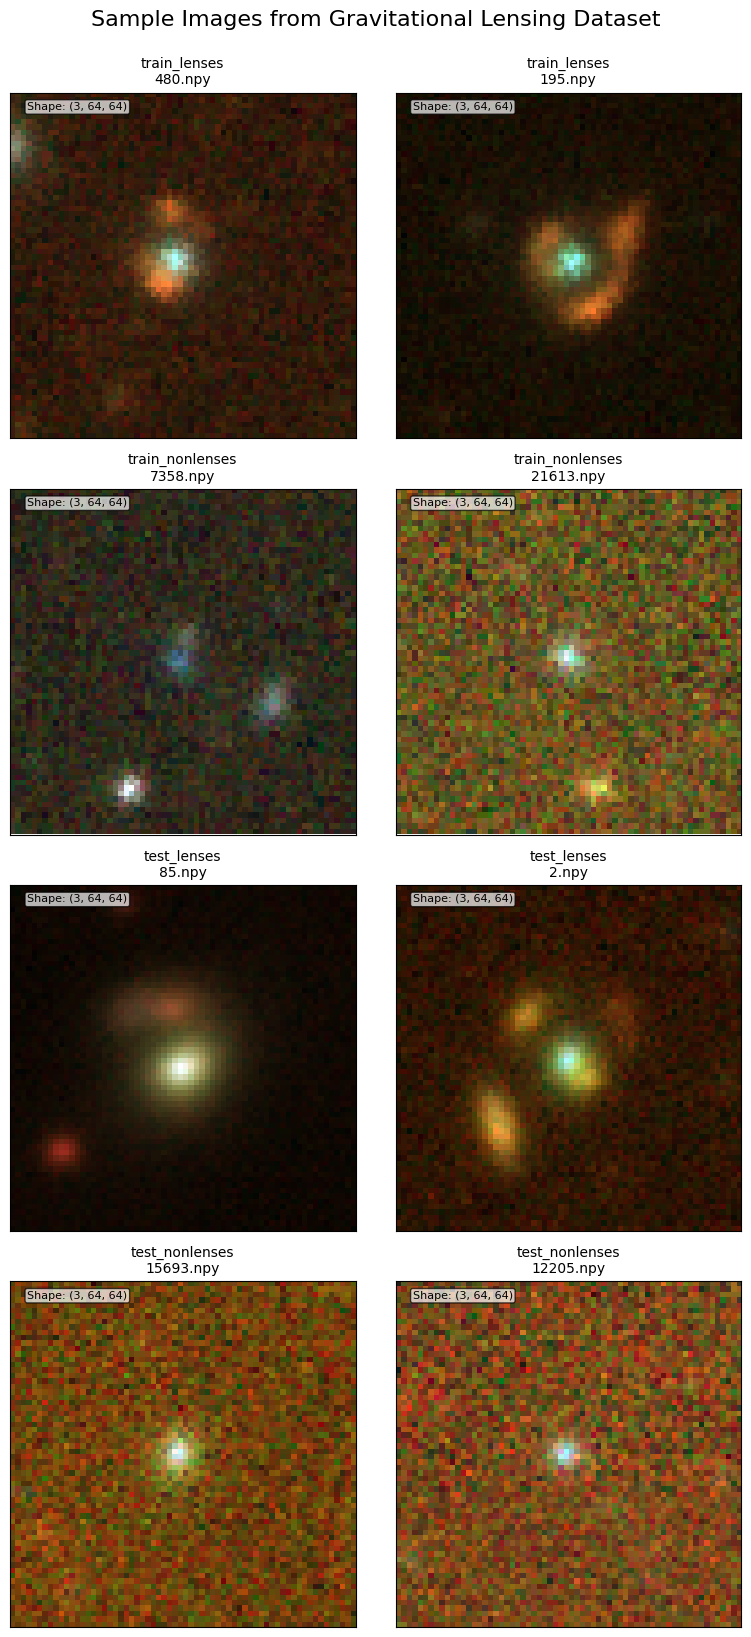

Image Statistics:

train_lenses:
  - Number of images: 1730
  - Image shape: (3, 64, 64)
  - Value range: [0.0000, 1.0000]

train_nonlenses:
  - Number of images: 28675
  - Image shape: (3, 64, 64)
  - Value range: [0.0000, 1.0000]

test_lenses:
  - Number of images: 195
  - Image shape: (3, 64, 64)
  - Value range: [0.0000, 1.0000]

test_nonlenses:
  - Number of images: 19455
  - Image shape: (3, 64, 64)
  - Value range: [0.0000, 1.0000]


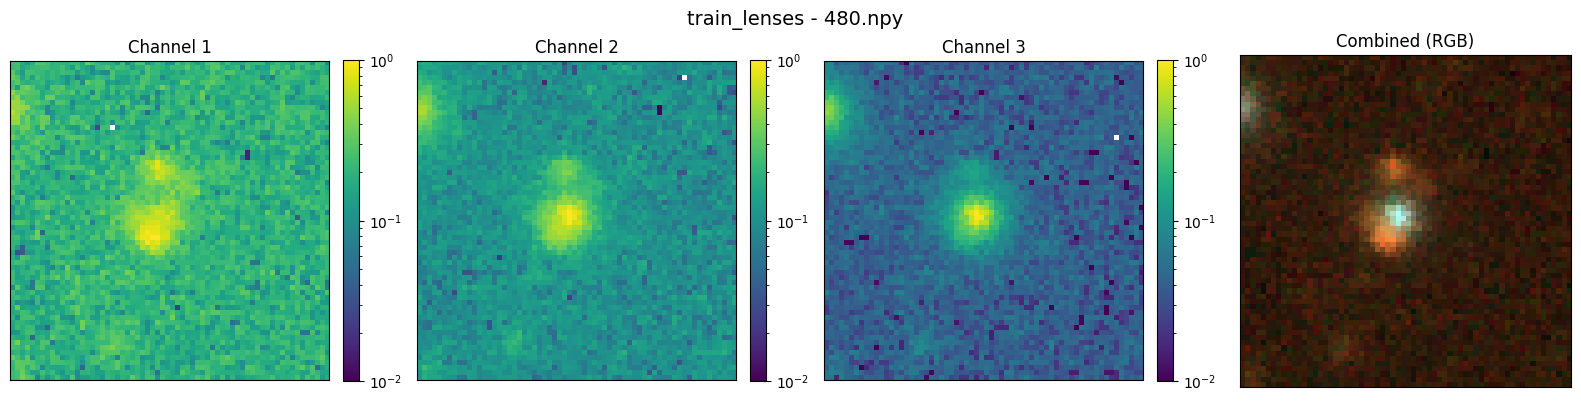

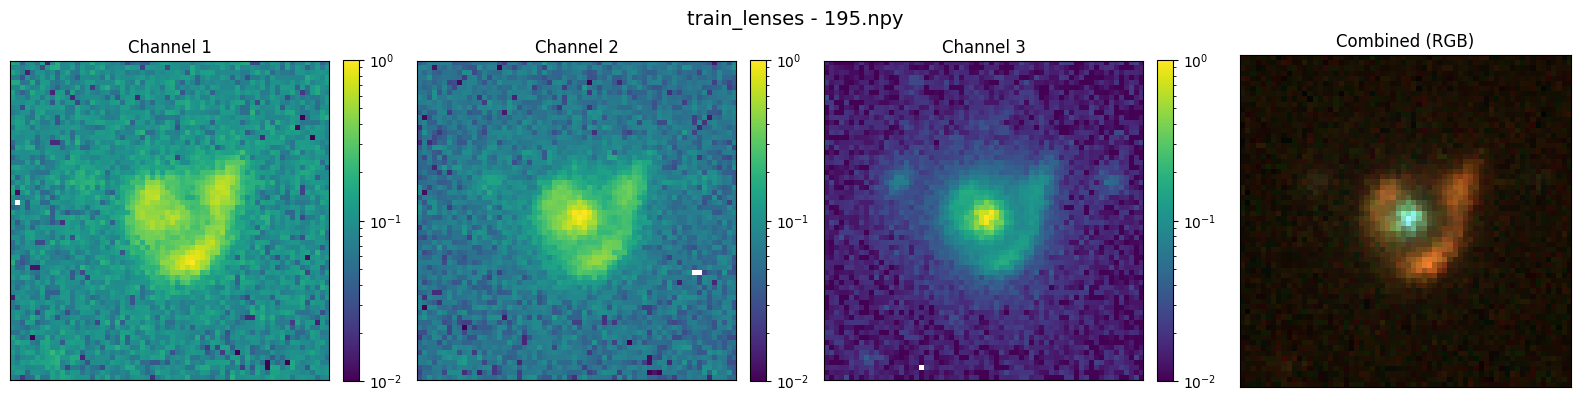

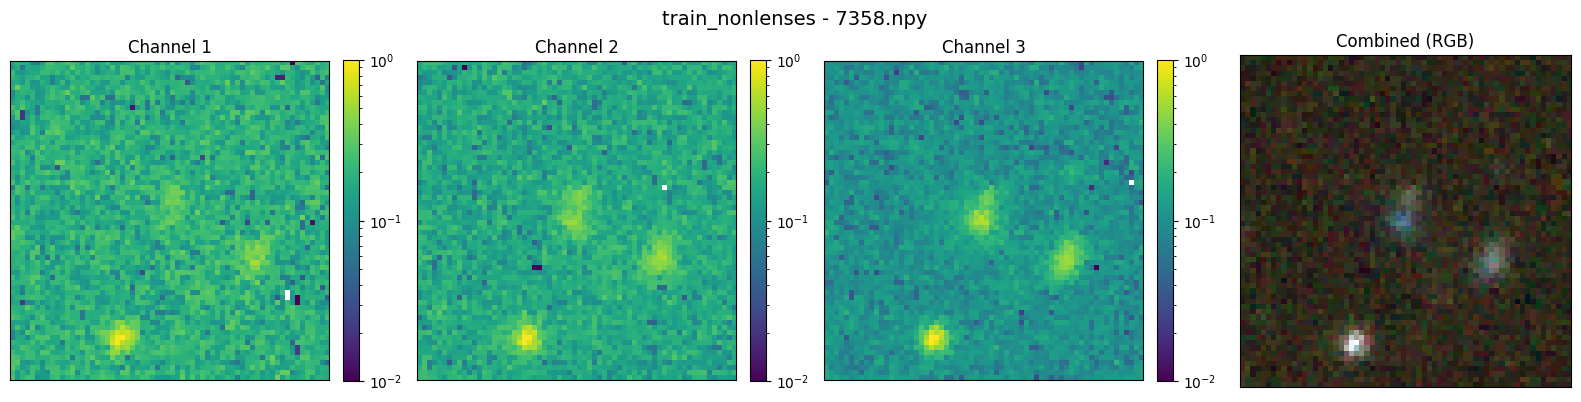

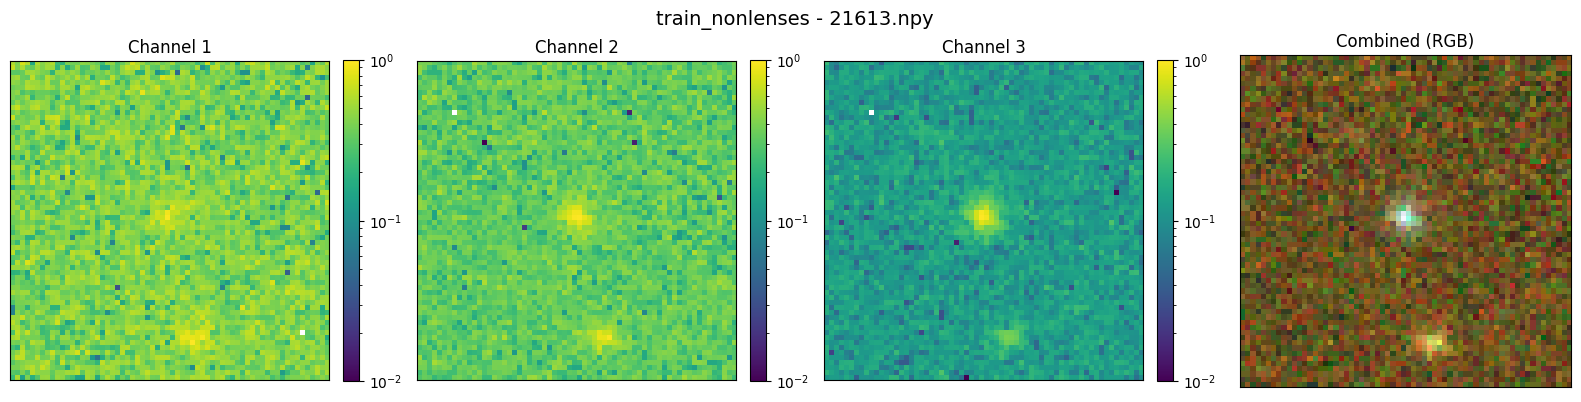

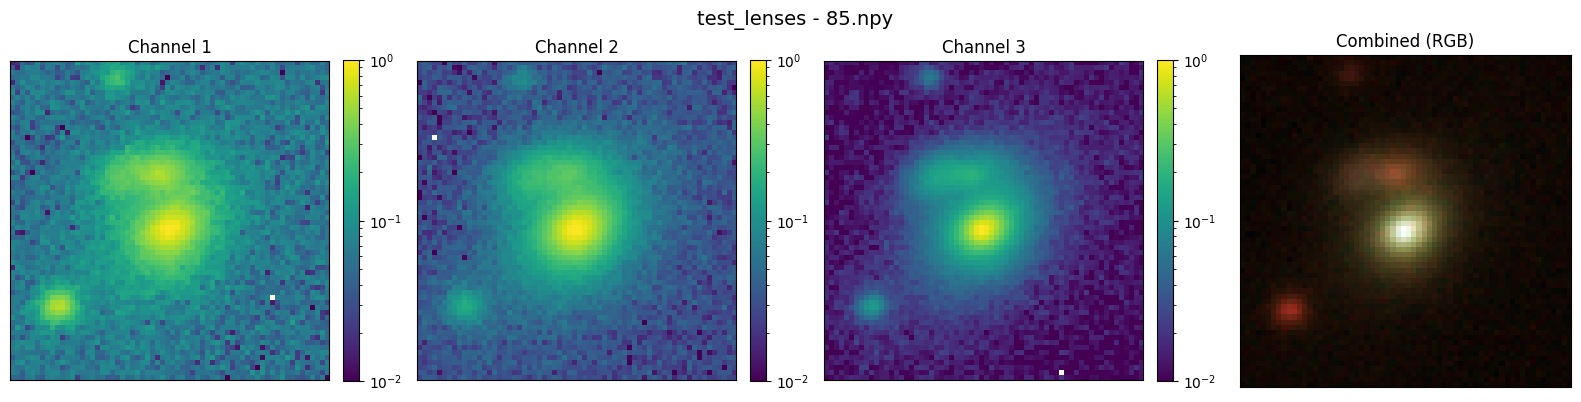

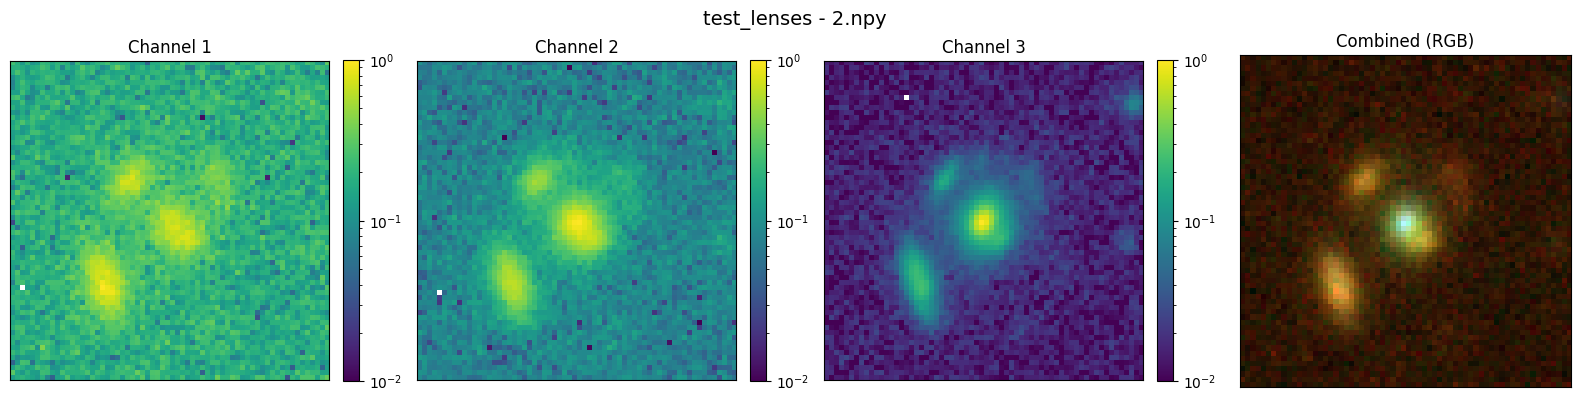

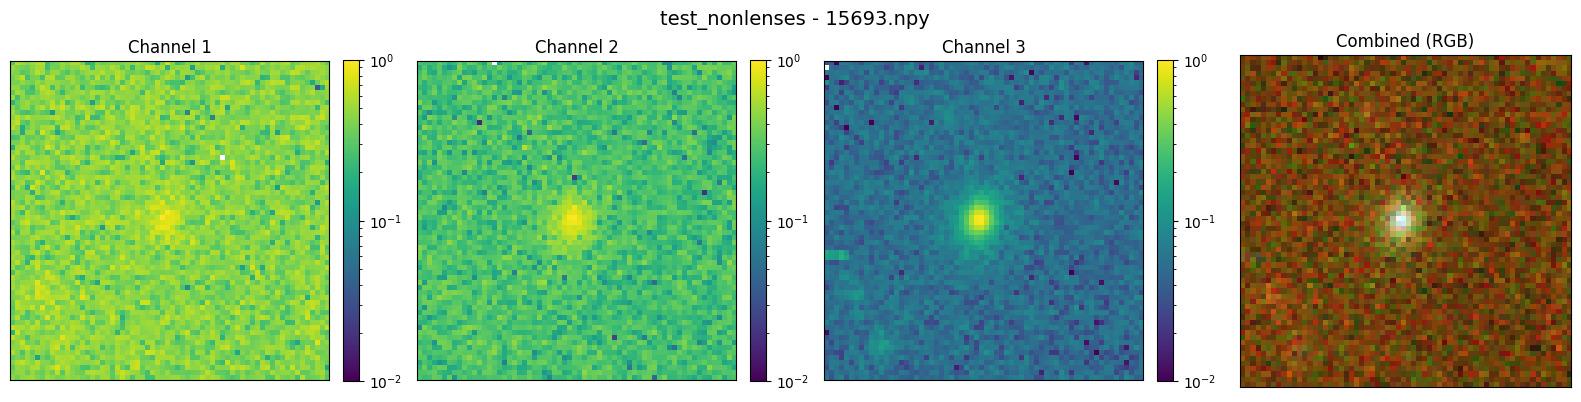

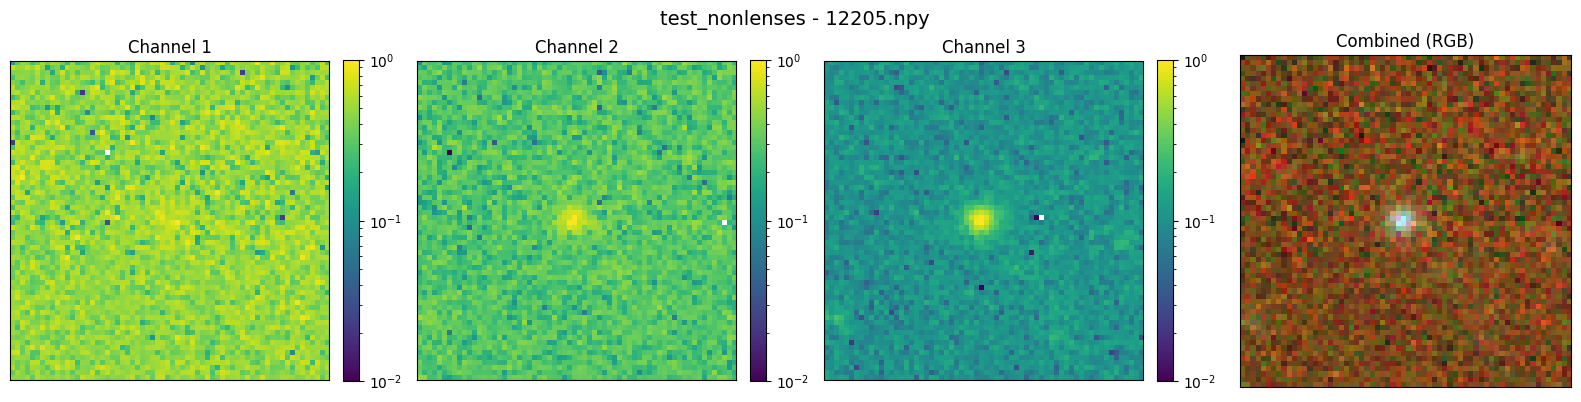

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import LogNorm

def visualize_sample_images(base_dir, num_samples=2, seed=42):
    """
    Visualize sample images from each subset of the lensing dataset,
    handling images with shape (3, 64, 64) correctly.
    
    Args:
        base_dir: Base directory of the dataset
        num_samples: Number of samples to visualize from each subset
        seed: Random seed for reproducibility
    """
    # Set random seed for reproducibility
    random.seed(seed)
    
    # Define the subsets to visualize
    subsets = [
        "train_lenses", 
        "train_nonlenses", 
        "test_lenses", 
        "test_nonlenses"
    ]
    
    # Set up the figure
    fig, axes = plt.subplots(len(subsets), num_samples, figsize=(num_samples*4, len(subsets)*4))
    
    # Loop through each subset
    for i, subset in enumerate(subsets):
        # Get file paths for the subset
        folder_path = os.path.join(base_dir, subset)
        file_paths = glob.glob(os.path.join(folder_path, '*.npy'))
        
        # Select random samples
        if len(file_paths) > 0:
            sample_paths = random.sample(file_paths, min(num_samples, len(file_paths)))
            
            # Plot each sample
            for j, path in enumerate(sample_paths):
                # Load the .npy file
                img = np.load(path)
                
                # Handle different image shapes
                if img.shape[0] == 3 and len(img.shape) == 3:  # If shape is (3, H, W)
                    # Convert to (H, W, 3) for matplotlib
                    img_display = np.transpose(img, (1, 2, 0))
                    
                    # For RGB visualization, normalize to [0, 1]
                    img_min, img_max = img_display.min(), img_display.max()
                    img_display = (img_display - img_min) / (img_max - img_min)
                    
                    # Plot the RGB image
                    ax = axes[i, j]
                    ax.imshow(img_display)
                    
                    # Add note about the data shape
                    ax.text(0.05, 0.95, f"Shape: {img.shape}", 
                            transform=ax.transAxes, 
                            fontsize=8,
                            bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7))
                else:
                    # Handle single-channel images
                    ax = axes[i, j]
                    
                    # If it's a 3D array but not RGB, take the first channel
                    if len(img.shape) == 3 and img.shape[0] != 3:
                        img = img[0]
                    
                    # Using LogNorm for better visualization
                    im = ax.imshow(img, cmap='viridis', norm=LogNorm(vmin=max(0.01, img.min()), vmax=img.max()))
                    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
                
                # Get the filename for title
                filename = os.path.basename(path)
                
                # Set title and labels
                ax.set_title(f"{subset}\n{filename}", fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])
    
    plt.tight_layout()
    plt.suptitle("Sample Images from Gravitational Lensing Dataset", fontsize=16, y=1.02)
    plt.savefig('sample_lensing_images.png', bbox_inches='tight', dpi=150)
    plt.show()
    
    # Print some statistics about the images
    print("Image Statistics:")
    for subset in subsets:
        folder_path = os.path.join(base_dir, subset)
        file_paths = glob.glob(os.path.join(folder_path, '*.npy'))
        
        if len(file_paths) > 0:
            # Load one image to get shape
            sample_img = np.load(file_paths[0])
            
            # Calculate statistics
            print(f"\n{subset}:")
            print(f"  - Number of images: {len(file_paths)}")
            print(f"  - Image shape: {sample_img.shape}")
            
            # Load multiple images to get value range
            values = []
            for i in range(min(20, len(file_paths))):
                img = np.load(file_paths[i])
                values.append(img.min())
                values.append(img.max())
            
            print(f"  - Value range: [{min(values):.4f}, {max(values):.4f}]")

def visualize_channels_separately(base_dir, num_samples=2, seed=42):
    """
    Visualize sample images from each subset, showing each channel separately
    for multi-channel images.
    
    Args:
        base_dir: Base directory of the dataset
        num_samples: Number of samples to visualize from each subset
        seed: Random seed for reproducibility
    """
    # Set random seed for reproducibility
    random.seed(seed)
    
    # Define the subsets to visualize
    subsets = [
        "train_lenses", 
        "train_nonlenses", 
        "test_lenses", 
        "test_nonlenses"
    ]
    
    # Loop through each subset
    for subset in subsets:
        # Get file paths for the subset
        folder_path = os.path.join(base_dir, subset)
        file_paths = glob.glob(os.path.join(folder_path, '*.npy'))
        
        # Select random samples
        if len(file_paths) > 0:
            sample_paths = random.sample(file_paths, min(num_samples, len(file_paths)))
            
            # Plot each sample
            for path in sample_paths:
                # Load the .npy file
                img = np.load(path)
                filename = os.path.basename(path)
                
                # Handle different image shapes
                if len(img.shape) == 3 and img.shape[0] == 3:  # If shape is (3, H, W)
                    # Create a figure for this image
                    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
                    
                    # Plot each channel separately
                    channel_names = ['Channel 1', 'Channel 2', 'Channel 3']
                    for c in range(3):
                        ax = axes[c]
                        im = ax.imshow(img[c], cmap='viridis', norm=LogNorm(vmin=max(0.01, img[c].min()), vmax=img[c].max()))
                        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
                        ax.set_title(f"{channel_names[c]}")
                        ax.set_xticks([])
                        ax.set_yticks([])
                    
                    # Plot combined RGB image
                    img_rgb = np.transpose(img, (1, 2, 0))
                    img_min, img_max = img_rgb.min(), img_rgb.max()
                    img_rgb = (img_rgb - img_min) / (img_max - img_min)
                    
                    axes[3].imshow(img_rgb)
                    axes[3].set_title("Combined (RGB)")
                    axes[3].set_xticks([])
                    axes[3].set_yticks([])
                    
                    plt.suptitle(f"{subset} - {filename}", fontsize=14)
                    plt.tight_layout()
                    plt.savefig(f'{subset}_{filename}_channels.png', bbox_inches='tight', dpi=150)
                    plt.show()
                else:
                    # For single-channel images, just show the image
                    plt.figure(figsize=(6, 6))
                    
                    # If it's a 3D array but not RGB, take the first channel
                    if len(img.shape) == 3:
                        print(f"Image shape: {img.shape}. Showing first channel.")
                        img = img[0]
                    
                    im = plt.imshow(img, cmap='viridis', norm=LogNorm(vmin=max(0.01, img.min()), vmax=img.max()))
                    plt.colorbar(im, fraction=0.046, pad=0.04)
                    plt.title(f"{subset} - {filename}")
                    plt.xticks([])
                    plt.yticks([])
                    plt.tight_layout()
                    plt.savefig(f'{subset}_{filename}.png', bbox_inches='tight', dpi=150)
                    plt.show()

# Example usage in Kaggle
if __name__ == "__main__":
    # For Kaggle, the path is typically /kaggle/input/dataset-name
    base_dir = "/kaggle/input/deeplense-lensefinding-dataset"
    
    # Visualize sample images
    visualize_sample_images(base_dir, num_samples=2)
    
    # Visualize channels separately
    visualize_channels_separately(base_dir, num_samples=2)

In [3]:
!pip install -U albumentations
import os
import glob
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import timm
import torch.nn as nn
import torch.optim as optim
import time
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.6/290.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 23.1 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


# Dataset - Dataloader


In [4]:
# ----------------------------
# Data Loading and Preprocessing
# ----------------------------
def get_file_paths_and_labels(sub_dir, label):
    """
    sub_dir: e.g. 'train_lenses' or 'train_nonlenses'
    label: 0 or 1
    """
    folder_path = os.path.join("../input/deeplense-lensefinding-dataset", sub_dir)
    file_paths = glob.glob(os.path.join(folder_path, '*.npy'))
    labels = [label] * len(file_paths)
    return file_paths, labels

# Training data
train_lens_paths, train_lens_labels = get_file_paths_and_labels("train_lenses", label=1)
train_nonlens_paths, train_nonlens_labels = get_file_paths_and_labels("train_nonlenses", label=0)

# Combine lens + non-lens for training
train_paths_full = train_lens_paths + train_nonlens_paths
train_labels_full = train_lens_labels + train_nonlens_labels

# Test data
test_lens_paths, test_lens_labels = get_file_paths_and_labels("test_lenses", label=1)
test_nonlens_paths, test_nonlens_labels = get_file_paths_and_labels("test_nonlenses", label=0)

# Combine lens + non-lens for testing
test_paths = test_lens_paths + test_nonlens_paths
test_labels = test_lens_labels + test_nonlens_labels

# Print some stats to verify the data loading
print(f"Training data: {len(train_paths_full)} samples")
print(f"  - Lens: {len(train_lens_paths)}")
print(f"  - Non-lens: {len(train_nonlens_paths)}")
print(f"Test data: {len(test_paths)} samples")
print(f"  - Lens: {len(test_lens_paths)}")
print(f"  - Non-lens: {len(test_nonlens_paths)}")


Training data: 30405 samples
  - Lens: 1730
  - Non-lens: 28675
Test data: 19650 samples
  - Lens: 195
  - Non-lens: 19455


In [5]:
# ----------------------------
# Dataset and DataLoader
# ----------------------------
class GalaxyDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        path = self.file_paths[idx]
        image = np.load(path)  # Expected shape (3, 64, 64)
        label = self.labels[idx]

        # Convert to HWC if necessary (Albumentations expects HWC)
        if image.shape[0] <= 4:
            image = np.transpose(image, (1, 2, 0))

        image = (image - image.min()) / (image.max() - image.min() + 1e-8)

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented["image"]
        else:
            # If no transform is applied, convert manually to tensor (CHW)
            image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)

        return image, torch.tensor(label, dtype=torch.long)


# Transformation

In [6]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Basic transforms for training with ToTensorV2
train_transform = A.Compose([
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    ToTensorV2()  # converts image from HWC numpy array to CHW tensor
])

# For validation/test, you can still use a simpler transform
val_transform = A.Compose([
    ToTensorV2()
])


In [7]:
# Split training data into train and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths_full,
    train_labels_full,
    test_size=0.1,
    stratify=train_labels_full,
    random_state=42
)

In [8]:
# Training dataset
train_dataset = GalaxyDataset(train_paths, train_labels, transform=train_transform)

# Validation dataset
val_dataset = GalaxyDataset(val_paths, val_labels, transform=val_transform)

# Test dataset
test_dataset = GalaxyDataset(test_paths, test_labels, transform=val_transform)

# Mitigating Class imbalances

In [9]:
# Create DataLoaders
batch_size = 4

# Handle class imbalance with WeightedRandomSampler
class_counts = [train_labels.count(0), train_labels.count(1)]
class_weights = [1.0 / count for count in class_counts]
sample_weights = [class_weights[label] for label in train_labels]

sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    sampler=sampler,
    num_workers=4,
    drop_last=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4
)

# Model

In [10]:
import torch
import torch.nn as nn
import timm

class TimmModelComplex(nn.Module):
    """
    A wrapper around timm's models to handle:
    - A custom input channel size (in_chans)
    - A dropout layer
    - A final linear layer with num_classes outputs
    """

    def __init__(
        self, 
        name="efficientnet_b0", 
        in_chans=3, 
        num_classes=2,   # 2 for binary classification
        pretrained=True, 
        dropout_rate=0.5
    ):
        super(TimmModelComplex, self).__init__()

        # Create a backbone from timm (removing the default head by setting num_classes=0)
        self.backbone = timm.create_model(
            name,
            pretrained=pretrained,
            in_chans=in_chans,
            num_classes=0
        )

        # Number of features output by the backbone
        backbone_features = self.backbone.num_features

        # Optional dropout before the final classification layer
        self.dropout = nn.Dropout(dropout_rate)

        # Final linear layer for classification
        self.classifier = nn.Linear(backbone_features, num_classes)

    def forward(self, x):
        # Extract features from the backbone
        features = self.backbone(x)
        # Apply dropout
        features = self.dropout(features)
        # Classify into num_classes
        out = self.classifier(features)
        return out


In [17]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score


# Decide on device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model = TimmModelComplex(
    name="efficientnet_b0",  # or any timm model
    in_chans=3,             # change to 3 if you have 3-channel images
    num_classes=2,          # binary classification
    pretrained=True,
    dropout_rate=0.5
)
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

best_auc = 0.0
num_epochs = 20

for epoch in range(num_epochs):
    ##############################
    #         TRAINING          #
    ##############################
    model.train()
    running_loss = 0.0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)

    ##############################
    #        VALIDATION         #
    ##############################
    model.eval()
    val_running_loss = 0.0
    y_true, y_scores = [], []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            # Convert outputs to probabilities via softmax
            # shape of outputs = (batch_size, 2)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability of class "1"

            y_true.extend(labels.cpu().numpy())
            y_scores.extend(probs.cpu().numpy())

    val_loss = val_running_loss / len(val_loader)
    # Compute AUC
    auc = roc_auc_score(y_true, y_scores)

    # Step the scheduler
    scheduler.step(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {epoch_loss:.4f} "
          f"Val Loss: {val_loss:.4f} "
          f"Val AUC: {auc:.4f}")

    # Track best AUC
    if auc > best_auc:
        best_auc = auc
        torch.save(model.state_dict(), "L2_model.pth")
        print("Saved Best Model!")

    # Early stopping example (optional)
    if best_auc > 0.99:
        print("AUC > 0.99, stopping early!")
        break


Epoch [1/20] Train Loss: 0.3567 Val Loss: 0.3697 Val AUC: 0.9528
Saved Best Model!
Epoch [2/20] Train Loss: 0.2116 Val Loss: 1.5583 Val AUC: 0.9039
Epoch [3/20] Train Loss: 0.1611 Val Loss: 0.8734 Val AUC: 0.9505
Epoch [4/20] Train Loss: 0.1368 Val Loss: 0.5227 Val AUC: 0.9695
Saved Best Model!
Epoch [5/20] Train Loss: 0.1188 Val Loss: 1.0718 Val AUC: 0.9641
Epoch [6/20] Train Loss: 0.0940 Val Loss: 1.8991 Val AUC: 0.9628
Epoch [7/20] Train Loss: 0.0885 Val Loss: 0.3684 Val AUC: 0.9723
Saved Best Model!
Epoch [8/20] Train Loss: 0.0845 Val Loss: 1.6404 Val AUC: 0.9538
Epoch [9/20] Train Loss: 0.0822 Val Loss: 3.4698 Val AUC: 0.9456
Epoch [10/20] Train Loss: 0.0762 Val Loss: 0.7774 Val AUC: 0.9670
Epoch [11/20] Train Loss: 0.0776 Val Loss: 0.5971 Val AUC: 0.9677
Epoch [12/20] Train Loss: 0.0693 Val Loss: 0.2912 Val AUC: 0.9662
Epoch [13/20] Train Loss: 0.0732 Val Loss: 0.4092 Val AUC: 0.9717
Epoch [14/20] Train Loss: 0.0679 Val Loss: 0.8657 Val AUC: 0.9537
Epoch [15/20] Train Loss: 0.066

In [11]:
from IPython.display import FileLink

FileLink('/kaggle/working/L2_model.pth')

/kaggle/working/L2_model.pth

In [12]:
import torch
model = model = TimmModelComplex(
    name="efficientnet_b0",  # or any timm model
    in_chans=3,             # change to 3 if you have 3-channel images
    num_classes=2,          # binary classification
    pretrained=True,
    dropout_rate=0.5
)
model.load_state_dict(torch.load('/kaggle/working/L2_model.pth'))


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

<ipython-input-12-7d4a03477e21>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/L2_model.pth'))


<All keys matched successfully>

In [15]:
import torch
import numpy as np
from sklearn.metrics import roc_auc_score

# Ensure model is on the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Validation phase
y_true = []  # Ground truth labels
y_pred = []  # Predicted probabilities

model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        # Move inputs and labels to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)  # Forward pass
        y_true.extend(labels.cpu().numpy())  # Move labels to CPU before converting to NumPy
        y_pred.extend(torch.softmax(outputs, dim=1).cpu().numpy())  # Move predictions to CPU

# Convert y_true to one-hot encoding
num_classes = 2  # Adjust based on your dataset
y_true_onehot = np.eye(num_classes)[y_true]  # Shape: [num_samples, num_classes]

# Compute AUC for each class (One-vs-Rest)
auc_scores = []
for i in range(num_classes):
    auc = roc_auc_score(y_true_onehot[:, i], np.array(y_pred)[:, i])
    auc_scores.append(auc)
    print(f"Class {i} AUC: {auc:.4f}")

Class 0 AUC: 0.9772
Class 1 AUC: 0.9772


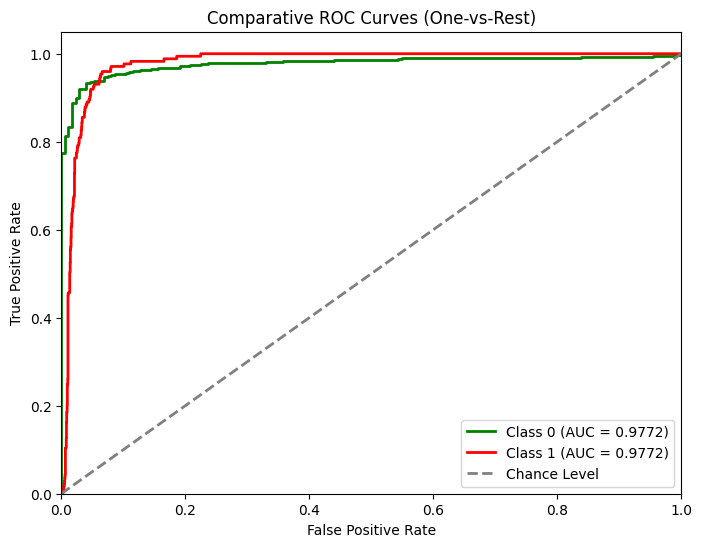

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming y_true_onehot and y_pred are computed from your validation phase
# y_true_onehot: shape [num_samples, num_classes]
# y_pred: shape [num_samples, num_classes]

num_classes = 2  # Update if needed
colors = [ 'green', 'red']

plt.figure(figsize=(8, 6))
ax = plt.gca()

for i in range(num_classes):
    # Compute False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], np.array(y_pred)[:, i])
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, color=colors[i], lw=2,
            label=f'Class {i} (AUC = {roc_auc:.4f})')

# Plot the chance line
ax.plot([0, 1], [0, 1], linestyle='--', color='grey', lw=2, label='Chance Level')

# Set plot details
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Comparative ROC Curves (One-vs-Rest)")
ax.legend(loc="lower right")
plt.show()

In [17]:
import torch
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Load the best model weights if needed
model.load_state_dict(torch.load('L2_model.pth', weights_only=True))

model.to(device)
model.eval()

# Testing phase: Evaluate performance on the test set
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:  # test_loader is your DataLoader for test data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        
        # Get predicted class (argmax over the logits)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        # Also store probabilities for ROC-AUC
        probabilities = torch.softmax(outputs, dim=1)
        all_probs.extend(probabilities.cpu().numpy())

# Convert lists to NumPy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Calculate Accuracy
accuracy = np.mean(all_preds == all_labels)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

# Compute multi-class ROC-AUC (One-vs-Rest)
num_classes = 2
all_labels_onehot = np.eye(num_classes)[all_labels]
auc = roc_auc_score(all_labels_onehot, all_probs, multi_class='ovr')
print(f"Test ROC-AUC: {auc:.4f}")

Test Accuracy: 0.9354
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     19455
           1       0.12      0.90      0.22       195

    accuracy                           0.94     19650
   macro avg       0.56      0.92      0.59     19650
weighted avg       0.99      0.94      0.96     19650

Confusion Matrix:
[[18205  1250]
 [   20   175]]
Test ROC-AUC: 0.9593


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load test data (adjust paths if needed)
def load_test_data(test_lenses_dir, test_nonlenses_dir):
    # Load lens test data (class 1)
    lens_files = [os.path.join(test_lenses_dir, f) for f in os.listdir(test_lenses_dir)]
    lens_images = [np.load(f) for f in lens_files]
    lens_labels = np.ones(len(lens_images))
    
    # Load non-lens test data (class 0)
    nonlens_files = [os.path.join(test_nonlenses_dir, f) for f in os.listdir(test_nonlenses_dir)]
    nonlens_images = [np.load(f) for f in nonlens_files]
    nonlens_labels = np.zeros(len(nonlens_images))
    
    # Combine data
    X_test = np.concatenate([lens_images, nonlens_images])
    y_test = np.concatenate([lens_labels, nonlens_labels])
    
    # Normalize pixel values to [0, 1]
    X_test = X_test.astype('float32') / 255.0
    return X_test, y_test

# Replace paths if necessary
test_lenses_dir = '/kaggle/input/deeplense-lensefinding-dataset/test_lenses'
test_nonlenses_dir = '/kaggle/input/deeplense-lensefinding-dataset/train_nonlenses'

X_test, y_test = load_test_data(test_lenses_dir, test_nonlenses_dir)

In [25]:
from torch.utils.data import DataLoader, TensorDataset

# Convert numpy arrays to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create a DataLoader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [26]:
y_pred_prob = []

# Disable gradient computation for inference
with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model(inputs)
        y_pred_prob.extend(outputs.sigmoid().cpu().numpy())  # Apply sigmoid for probabilities

y_pred_prob = np.array(y_pred_prob).ravel()  # Flatten the predictions

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [28870, 0]